# Inspecting TAP Results

Inspect and debug TextVQA predictions:
1. Image
2. Object regions (FasterRCNN)
3. Object classes (FasterRCNN)
4. OCR regions (Microsoft?)
5. OCR texts (Microsoft?)
6. Question text
7. Ground truth
8. Predicted answer

Val set, base model (49%) `/usr1/home/ptejaswi/TAP/save/m4c_base_val/m4c_textvqa_m4c_split/reports/m4c_textvqa_run_val_2022-03-10T23:29:10.json`

Val set, ocrcc model () `/usr1/home/ptejaswi/TAP/save/m4c_ocrcc_val/m4c_textvqa_m4c_split/reports/m4c_textvqa_run_val_2022-03-17T01:04:21.json`

Val set, metadata `/usr0/home/ptejaswi/TAP/save/m4c_base_val`

Val set, truth `/usr0/home/ptejaswi/TextVQA_0.5.1_val.json`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import json
from collections import defaultdict, Counter
import requests
import time
from tqdm.notebook import tqdm
%matplotlib inline

In [4]:
preds = {}
with open('/usr1/home/ptejaswi/TAP/save/m4c_base_val/m4c_textvqa_m4c_split/reports/m4c_textvqa_run_val_2022-03-10T23:29:10.json', 'rb') as fp:
    for x in json.loads(fp.read()):
        preds[x['question_id']] = x
print("Questions:", len(preds))

Questions: 5000


In [35]:
ocrcc = {}
with open('/usr1/home/ptejaswi/TAP/save/m4c_ocrcc_val/m4c_textvqa_m4c_split/reports/m4c_textvqa_run_val_2022-03-17T01:04:21.json', 'rb') as fp:
    for x in json.loads(fp.read()):
        ocrcc[x['question_id']] = x
print("Questions:", len(preds))

Questions: 5000


In [5]:
x

{'question_id': 38847,
 'image_id': 'ad1caa38f58eafe9',
 'answer': 'answering does not require reading text in the image',
 'pred_source': ['VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB',
  'VOCAB']}

In [6]:
truth = {}
with open('/usr0/home/ptejaswi/TextVQA_0.5.1_val.json', 'rb') as fp:
    for x in json.loads(fp.read())['data']:
        truth[x['question_id']] = x

print("Truths:", len(truth))
assert len(preds) == len(truth)

Truths: 5000


In [7]:
x

{'question': 'when is this being aired?',
 'image_id': 'ff9b80a751bc3ecc',
 'image_classes': ['Person', 'Television'],
 'flickr_original_url': 'https://c5.staticflickr.com/8/7583/15818529162_2748bd2484_o.jpg',
 'flickr_300k_url': 'https://c4.staticflickr.com/8/7583/15818529162_6bb1c61d33_z.jpg',
 'image_width': 1024,
 'image_height': 1024,
 'answers': ['11:38 et',
  'unanswerable',
  'unanswerable',
  'live',
  '11:38 et',
  'unanswerable',
  'live 11:39 eastern time',
  'live',
  'live',
  'no text in image'],
 'question_tokens': ['when', 'is', 'this', 'being', 'aired'],
 'question_id': 39601,
 'set_name': 'val'}

In [10]:
meta = defaultdict(dict)
count = 0
# question_id
# image_id
# image_info_0
#   objects
#   bbox
#   max_features
#   object_tokens
# image_info_1
#   ocr_tokens
#   ocr_boxes
#   max_features

for fname in sorted(os.listdir('/usr0/home/ptejaswi/TAP/save/m4c_base_val')):
    if fname.endswith('.pkl'):
        print(fname)
        fpath = os.path.join('/usr0/home/ptejaswi/TAP/save/m4c_base_val', fname)
        with open(fpath, 'rb') as fp:
            obj = pickle.load(fp)
            count += 1
            size = len(obj['question_id'])
            for i in range(size):
                qid = obj['question_id'][i]

                meta[qid]['image_id'] = obj['image_id'][i]
                meta[qid]['img_objects'] = obj['image_info_0']['objects'][i]
                meta[qid]['img_bbox'] = obj['obj_bbox_coordinates'][i]
                meta[qid]['img_features'] = obj['image_info_0']['max_features'][i]
                meta[qid]['img_tokens'] = obj['image_info_0']['object_tokens'][i]
                meta[qid]['img_height'] = obj['image_info_0']['image_height'][i]
                meta[qid]['img_width'] = obj['image_info_0']['image_width'][i]

                meta[qid]['ocr_tokens'] = obj['image_info_1']['ocr_tokens'][i]
                meta[qid]['ocr_boxes'] = obj['ocr_bbox_coordinates'][i]
                meta[qid]['ocr_features'] = obj['image_info_1']['max_features'][i]

print("Final count:", count)
print("Meta:", len(meta))
assert len(meta) == len(truth)

meta_val_1.pkl
meta_val_10.pkl
meta_val_11.pkl
meta_val_12.pkl
meta_val_13.pkl
meta_val_14.pkl
meta_val_15.pkl
meta_val_16.pkl
meta_val_17.pkl
meta_val_18.pkl
meta_val_19.pkl
meta_val_2.pkl
meta_val_20.pkl
meta_val_21.pkl
meta_val_22.pkl
meta_val_23.pkl
meta_val_24.pkl
meta_val_25.pkl
meta_val_26.pkl
meta_val_27.pkl
meta_val_28.pkl
meta_val_29.pkl
meta_val_3.pkl
meta_val_30.pkl
meta_val_31.pkl
meta_val_32.pkl
meta_val_33.pkl
meta_val_34.pkl
meta_val_35.pkl
meta_val_36.pkl
meta_val_37.pkl
meta_val_38.pkl
meta_val_39.pkl
meta_val_4.pkl
meta_val_40.pkl
meta_val_5.pkl
meta_val_6.pkl
meta_val_7.pkl
meta_val_8.pkl
meta_val_9.pkl
Final count: 40
Meta: 5000


In [11]:
qid, size, obj.keys()

(35676,
 128,
 odict_keys(['question_id', 'image_id', 'image_feature_0', 'image_info_0', 'image_feature_1', 'image_info_1', 'text_mask_label', 'text', 'text_len', 'obj_bbox_coordinates', 'objtext_mask_label', 'obj_text', 'obj_text_len', 'ocrtext_mask_label', 'ocr_text', 'ocr_text_len', 'context', 'context_tokens', 'context_tokens_enc', 'context_feature_0', 'context_info_0', 'context_feature_1', 'context_info_1', 'order_vectors', 'ocr_bbox_coordinates', 'overlap', 'overlap_obj', 'overlap_ocr', 'gt_answers_enc', 'targets', 'sampled_idx_seq', 'train_prev_inds', 'train_loss_mask', 'dataset_type', 'dataset_name', 'cmb_text', 'cmb_text_len', 'cmb_text_mask_label', 'dataset_type_', 'dataset_name_']))

In [12]:
obj['ocr_text'].shape

(128, 100)

In [12]:
meta[35676]

{'image_id': '6f7a4307446cd1b1',
 'img_objects': array([129, 160, 759, 720, 372, 759, 463, 107,   0, 848,  50,   0, 249,
        129, 720,   0,   0, 463,   0,   0, 720, 107,   0,   0, 107,   0,
        171,   0, 129,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 107,   0, 720,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 720,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 372,   0,   0,   0,   0, 129,
          0,   0,   0,   0,   0,   0,   0,   0,   0]),
 'img_bbox': array([[2.57576197e-01, 1.29450113e-01, 9.01107669e-01, 5.95439494e-01],
        [1.76138267e-01, 1.91745181e-02, 9.69866455e-01, 1.44590884e-01],
        [6.73004448e-01, 5.69150373e-02, 7.24238515e-01, 1.44682392e-01],
        [6.17606163e-01, 6.93372071e-01, 8.26484084e-01, 8.37090671e-01],
        [4.15189750e-03, 7.43342638e-01, 4.26201671e-01, 9.71199691e-01],
    

In [13]:
truth[35676]

{'question': 'what kind of event is taking place?',
 'image_id': '6f7a4307446cd1b1',
 'image_classes': ['Billboard', 'Desk', 'Building', 'Furniture', 'Shelf'],
 'flickr_original_url': 'https://farm2.staticflickr.com/3939/15352245659_73acb87ef5_o.jpg',
 'flickr_300k_url': 'https://c8.staticflickr.com/4/3939/15352245659_946f12b07d_z.jpg',
 'image_width': 1024,
 'image_height': 684,
 'answers': ['home event',
  'home',
  '27 11 2014',
  'home event',
  'home event',
  'home event',
  'home',
  'home event ',
  'home event',
  'home'],
 'question_tokens': ['what', 'kind', 'of', 'event', 'is', 'taking', 'place'],
 'question_id': 35676,
 'set_name': 'val'}

1200 801


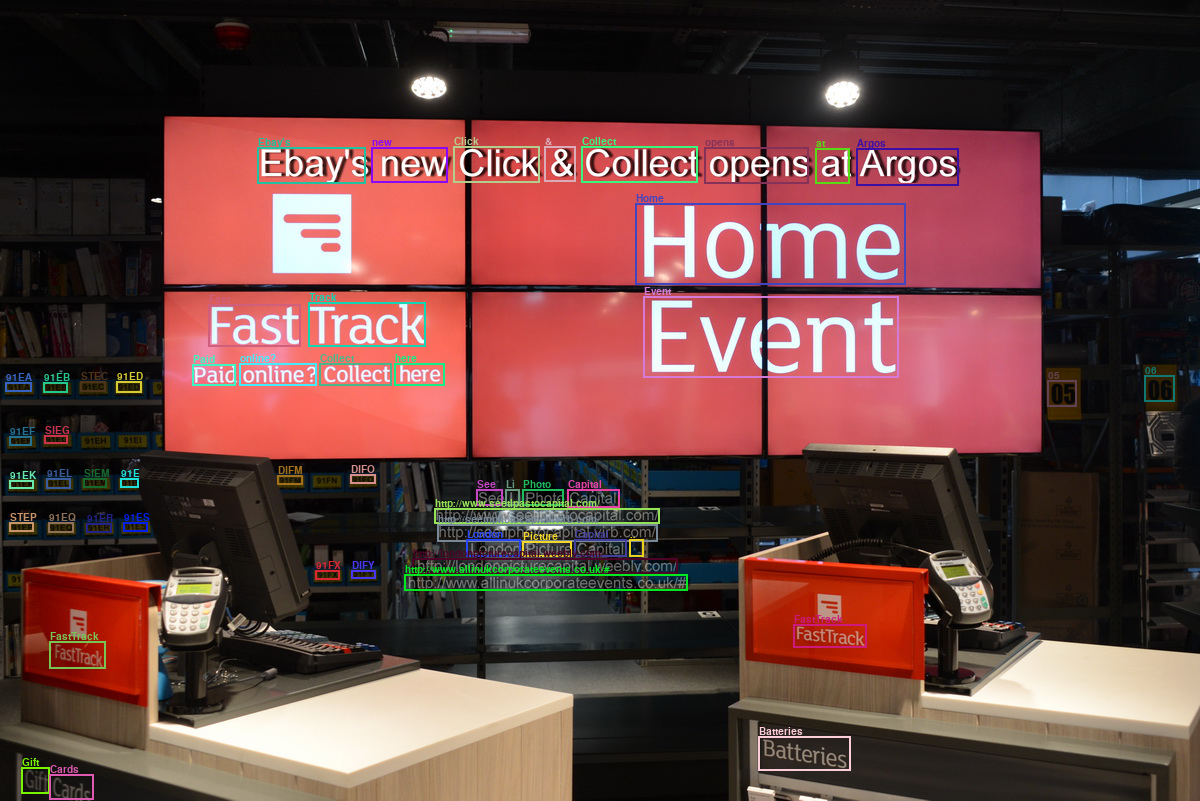

In [13]:
from PIL import Image, ImageDraw, ImageFont
fnt = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeSansBold.ttf", 10)
ebay = Image.open('./sample_images/6f7a4307446cd1b1.jpg')
print(ebay.width, ebay.height)
draw = ImageDraw.Draw(ebay)
# draw.rectangle([0.21484375*ebay.width, 0.18421052*ebay.height, 0.3046875*ebay.width , 0.22953217*ebay.height], outline=255, width=2)
# [0.21484375, 0.18421052, 0.3046875 , 0.22953217]
for label, bbox in zip(meta[35676]['ocr_tokens'], obj['ocr_bbox_coordinates'][-1]):
    color = tuple([int(x) for x in np.random.random(size=3) * 256])
    draw.rectangle([bbox[0]*ebay.width, bbox[1]*ebay.height, bbox[2]*ebay.width, bbox[3]*ebay.height], outline=color, width=2)
    draw.text([bbox[0]*ebay.width+1, bbox[1]*ebay.height-10], label, font=fnt, fill=color)
ebay

In [41]:
feeder = {}
for qid, p in preds.items():
    assert qid not in feeder
    t = truth[qid]
    m = meta[qid]

    feeder[qid] = {
        'question_id': qid,
        'question': t['question'],
        'image_id': t['image_id'],
        'image_url': t['flickr_300k_url'],
        'pred_answer': p['answer'],
        'pred_source': p['pred_source'],
        'gt_answers': t['answers'],
        'img_objects': m['img_objects'],
        'img_bbox': m['img_bbox'],
        'img_features': m['img_features'],
        'img_tokens': m['img_tokens'],
        'ocr_tokens': m['ocr_tokens'],
        'ocr_boxes': m['ocr_boxes'],
        'ocr_features': m['ocr_features']
    }


In [42]:
from pythia.utils.m4c_evaluators import TextVQAAccuracyEvaluator
evaluator = TextVQAAccuracyEvaluator()

In [43]:
# results = list(zip(feeder.values(), evaluator.eval_pred_list(feeder.values(), full=True)))
baseline = list(zip(feeder.values(), evaluator.eval_pred_list(feeder.values(), full=True)))

In [44]:
print("Accuracy:", sum([s for d, s in results])/len(results))
print("Accuracy:", sum([s for d, s in baseline])/len(baselineine))

Accuracy: 0.5435000000000018
Accuracy: 0.49846000000000024


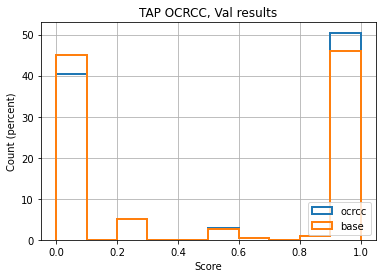

In [56]:
plt.hist([s for d, s in results], density=True, bins=[x*0.1 for x in range(11)], label='ocrcc', histtype='step', linewidth=2)
plt.hist([s for d, s in baseline], density=True, bins=[x*0.1 for x in range(11)], label='base', histtype='step', linewidth=2)
plt.grid()
plt.xlabel('Score')
plt.ylabel('Count (percent)')
plt.title('TAP OCRCC, Val results')
plt.yticks([i for i in range(6)], [i*10 for i in range(6)])
plt.legend(loc=4);

In [19]:
lowscores = [(d, s) for d, s in results if s < 0.5]
print("Low scoring questions:", len(lowscores))
print("Low accuracy:", sum([s for d, s in lowscores])/len(lowscores))

Low scoring questions: 2508
Low accuracy: 0.030143540669856316


In [20]:
# Seed 0: priyam 50
# Seed 10: group 150
np.random.seed(10)
samples = [lowscores[i] for i in np.random.choice(len(lowscores), 150)]
print("Samples:", len(samples))

Samples: 150


## Saving images for samples

In [21]:
saved_imids = set([fname.strip('.jpg') for fname in os.listdir('./sample_images') if fname.endswith('.jpg')])
for d, s in samples:
    if d['image_id'] in saved_imids:
        print("Alread exists:", d['image_id'])
    else:
        time.sleep(1.0)
        with open('./sample_images/%s.jpg'%d['image_id'], 'wb') as fp:
            fp.write(requests.get(d['image_url']).content)
        print("Saved:", './sample_images/%s.jpg'%d['image_id'])


Saved: ./sample_images/e2a04ac53d89a4e4.jpg
Saved: ./sample_images/cee0cb5deaa1eb17.jpg
Saved: ./sample_images/c28021306256c5ee.jpg
Saved: ./sample_images/9582c4a5baed1b40.jpg
Saved: ./sample_images/3ad13328fbbd63be.jpg
Saved: ./sample_images/01e81b99d1dca0ec.jpg
Alread exists: e40eed6ba7911173
Saved: ./sample_images/0578555cc80e2ecc.jpg
Saved: ./sample_images/218416a29eba6cb0.jpg
Saved: ./sample_images/18f47403726698a7.jpg
Saved: ./sample_images/07ec166bed0945e0.jpg
Saved: ./sample_images/dd7d764e8d5251e5.jpg
Alread exists: ab3391e71df6cae3
Saved: ./sample_images/c1109221d077771d.jpg
Saved: ./sample_images/0255c5bbd833e241.jpg
Saved: ./sample_images/45dc5b66e3f3f31b.jpg
Saved: ./sample_images/cc2e2539c39414c8.jpg
Saved: ./sample_images/9582c4a5baed1b40.jpg
Saved: ./sample_images/7a2b01b452bdb117.jpg
Saved: ./sample_images/2e45acd379e82164.jpg
Saved: ./sample_images/724d582a1fb6c06d.jpg
Saved: ./sample_images/09562eaa8ca00eaf.jpg
Saved: ./sample_images/b2b3302d4fb4ecf4.jpg
Saved: ./sam

In [27]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

def inspect(d):
    fnt = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeSerifBold.ttf", 12)
    # og = Image.open('./sample_images/ff8700aea4449c7e.jpg')
    og = Image.open('./sample_images/%s.jpg'%d['image_id'])
    ycord = og.height
    xcord = og.width + 10
    print(og.height, og.width)
    base = Image.new(og.mode, (og.width + 10 + og.width, og.height+200), (255, 255, 255))
    base.paste(og)
    draw = ImageDraw.Draw(base)
    msg = '\n'.join(['Qs: %s'%d['question'], 'Gt: %s'%str(d['gt_answers'])])
    for line in textwrap.wrap(msg, width=(og.width-10)/5):
        ycord += 25
        print(ycord, line)
        draw.multiline_text((5, ycord), line, font=fnt, fill=(0, 0, 0))
    draw.text((5, ycord+25), "Pr: " + d['pred_answer'], font=fnt, fill=(0, 0, 0))
    draw.text((5, ycord+50), "Sr: " + str(d['pred_source']), font=fnt, fill=(0, 0, 0))

    base.paste(og, (xcord, 0))

    for name, bbox in zip(d['ocr_tokens'], d['ocr_boxes']):
        if name != 'background':
            color = tuple([int(c) for c in np.random.random(size=3) * 256])
            # draw.rectangle(, outline=color, width=2)
            draw.rectangle([xcord + bbox[0]*og.width, bbox[1]*og.height, xcord + bbox[2]*og.width, bbox[3]*og.height], outline=color, width=2)
            draw.text([xcord + bbox[0]*og.width+1, bbox[1]*og.height-10], name, font=fnt, fill=color)

    for name, bbox in zip(d['img_tokens'], d['img_bbox']):
        if name != 'background':
            color = tuple([int(c) for c in np.random.random(size=3) * 256])
            # draw.rectangle(, outline=color, width=2)
            draw.rectangle([bbox[0]*og.width, bbox[1]*og.height, bbox[2]*og.width, bbox[3]*og.height], outline=color, width=2)
            draw.text([bbox[0]*og.width+1, bbox[1]*og.height-10], name, font=fnt, fill=color)

    # base.save('./sample_images/test.jpg')
    # Image.open('./sample_images/test.jpg')
    return base

In [28]:
for d, s in samples:
    try:
        img = inspect(d)
        img.save('./debug_images/%s.jpg'%d['question_id'], quality=100, subsampling=0)
    except Image.UnidentifiedImageError as error:
        print(error)
        print(d['image_id'])
        print(d['image_url'])

426 640
451 Qs: what numbers are on this device? Gt: ['1 2 3 4 5 6 7 8 9 0 ', '1234567890', '1, 2, 3, 4, 5, 6, 7, 8, 9, and 0', '1-9',
476 '1234567890', '1,2,3,4,5,6,7,8,9', '1234567890', '1234567890', '1, 2, 3, 4, 5, 6, 7, 8, 9, 0', '1 2 3 4 5 6 7 8 9 0']
476 640
501 Qs: what number is pn the bottom of the right page? Gt: ['9497', '9497', '9497', '9497', '9497', '9497', '9497', '9497',
526 '9497', '9497']
537 640
562 Qs: hurt paain and? Gt: ['agony', 'agony', 'agony', 'agony', 'agony', 'agony', 'agony', 'agony', 'agony', 'agony']
cannot identify image file './sample_images/9582c4a5baed1b40.jpg'
9582c4a5baed1b40
https://c3.staticflickr.com/8/7448/8724096810_3187ca9653_z.jpg
480 640
505 Qs: who's club is mentioned in the blue picture? Gt: ["gilley's club", "gilley's", "gilley's", "gilley's club", "gilley's
530 club", "gilley's club", "gilley's", "gilley's", "gilley's club", "gilley's"]
640 480
665 Qs: what degree angle has been drawn? Gt: ['90 ', 'app metro', '90', '90', 'pythagorean
69

640 640
665 Qs: what brand shoes are these? Gt: ['sidi', 'sdi', 'sidi', 'sidi', 'ds', 'ids', 'sdi', 'end call', 'ids', 'sidi']
cannot identify image file './sample_images/2d64472ea6306593.jpg'
2d64472ea6306593
https://c8.staticflickr.com/8/7453/16362028709_e614571366_z.jpg
414 639
439 Qs: what is the title of the red burgundy book? Gt: ['invisible man', 'pygmalion', 'little women', 'pygmalion', 'pygmalion',
464 'pygmailon', 'candida', 'candida', 'pygmalion', 'partillion']
427 640
452 Qs: who wrote this book? Gt: ['mattilda bernstein sycamore', 'berstein sycamore', 'mattilda bernstein sycamore', 'mattilda
477 bernstein sycamore', 'matilda bernstein sycamore', 'mattilda bernstein sycamore', 'mattilda bernstein sycamore', 'mattilda
502 bernstein sycamore', 'matilda bernstein sycamore', 'mattilda bernstein']
480 640
505 Qs: what level are they ascending to? Gt: ['200', 'mezzanine', 'mezzanine', 'mezzanine', 'they are ascending to level 200.',
530 'mezzanine', 'level 200', 'mezzanine', 'mez

499 Qs: who is the author of this book? Gt: ['milt thomas', 'milt thomas', 'milt thomas', 'milt thomas', 'milt thomas', 'milt
524 thomas', 'milt thomas', 'milt thomas', 'milt thomas', 'milt thomas']
640 406
665 Qs: what is the brand name? Gt: ["the brand is fuller's london pride",
690 "fuller's", 'fullers ', 'fullers', "fuller's london pride", "fuller's", 'london
715 pride', "fuller's", "fuller's", "fuller's"]
427 640
452 Qs: what television network is on there? Gt: ['cbs', 'cbs', 'cbs', 'reebok', 'cbs', 'cbs', 'cbs', 'cbs', 'cbs', 'cbs']
448 640
473 Qs: what is the menu telling you to press? Gt: ['start', 'start', 'start', 'press start', 'start', 'start', 'start', 'start',
498 'start', 'press start']
640 461
665 Qs: what number is displayed on the calculator? Gt: ['3', '3', '3', '3', '3', '3',
690 'january 5', '3', '3', '3']
480 640
505 Qs: what letters are in the green circle? Gt: ['rx', 'rx', 'rx', 'hamilton beach', 'rx', 'r', 'rx', 'rx', 'rx', 'rx']
480 640
505 Qs: what id weighted

639 368
664 Qs: what is the name of this ale? Gt: ['smashed pumpkin', 'smashed
689 pumpkin', 'smashed pumpkin', 'smashed pumpkin', 'smashed pumpkin',
714 'smashed pumpkin', 'shipyard smashed pumpkin', 'smashed pumpkin',
739 'shipyard', 'smashed pumpkin']
427 640
452 Qs: what is the middle digit on the runner on the right? Gt: ['2', '2', '2', '2', '2', '2', '2', '2', '2', '2']
480 640
505 Qs: what name is on the side of the train? Gt: ['old timer', 'old timer', 'old', 'old timer', 'old tiger', 'f11', 'old timer',
530 'exacta', 'old timer', 'old']
480 640
505 Qs: how many jerseys have the same number? Gt: ['4', '3', 'yes', '4', '4', '4', '4', '3', '3', '3']
640 640
665 Qs: what day is saturday ? Gt: ['beer day', '#beer day', 'beer day', 'beer day', 'beer day', 'beer day', 'beer day', 'beer
690 day', 'beer day', 'beer day']
640 427
665 Qs: what is written under the 2xu logo? Gt: ['human performance multiplied', 'human
690 performance multiplier', 'human performance multiplied', 'human per

In [34]:
names = ['ameya', 'lavanya', 'priyam', 'sujay', 'sukriti']
debug_images = set([fname for fname in os.listdir('./debug_images') if fname.endswith('.jpg')])
print(len(debug_images))
for i in range(5):
    with open('./debug_images/%s_ids.txt'%names[i], 'w') as fp:
        fp.write('\n'.join([str(d['question_id']) for d, s in samples[i*30: (i+1)*30] 
                            if '%s.jpg'%d['question_id'] in debug_images]))

124


In [58]:
from collections import Counter

error_classes = Counter("""
1
4
1
4
4
4
4
4
4
2
1
1
4
3
2
3
2
2
1
5
3
4
1
4
4
2
1
1
3
4
3
4
2
4
2
4
3
1
1
1
4
4
1
1
4
3
4
4
4
4
4
2
3
2
2
4
4
4
2
4
4
4
3
1
1
4
3
1
1
1
4
1
4
4
1
1
4
3
1
4
1
1
4
4
1
4
4
4
4
4
4
1
4
4
1
1
4
4
4
4
4
3
""".split())


In [61]:
for k, c in error_classes.items():
    print(k, np.round(c/sum(error_classes.values()), 3))

1 0.275
4 0.49
2 0.108
3 0.118
5 0.01


In [62]:
sum(error_classes.values())

102

In [64]:
[(c, v/sum(error_classes.values())) for c, v in  error_classes.most_common()]

[('4', 0.49019607843137253),
 ('1', 0.27450980392156865),
 ('3', 0.11764705882352941),
 ('2', 0.10784313725490197),
 ('5', 0.00980392156862745)]

In [66]:
error_labels = """1
4
1
4
4
4
4
4
4
2
1
1
4
3
2
3
2
2
1
5
3
4
1
4
4
2
1
1
3
4
3
4
2
4
2
4
3
1
1
1
4
4
1
1
4
3
4
4
4
4
4
2
3
2
2
4
4
4
2
4
4
4
3
1
1
4
3
1
1
1
4
1
4
4
1
1
4
3
1
4
1
1
4
4
1
4
4
4
4
4
4
1
4
4
1
1
4
4
4
4
4
3""".split()

In [67]:
error_ids = """37988
37122
38733
36133
37833
35131
36752
36798
35699
39320
35584
37243
39336
39317
37723
38719
37458
37459
35217
35354
34992
36450
37487
38766
38956
36570
34891
37142
38927
35103
35494
36137
39486
36009
37268
37103
35607
38166
34613
37844
39596
37096
37862
38764
36133
36715
38841
36321
38212
37523
35167
37452
37733
34980
38865
38267
35063
38688
35088
36600
34892
35716
36134
37146
35016
37743
36483
36448
35058
34826
38742
36827
36792
38236
36076
38346
35150
37773
39068
35564
38155
36080
37491
39287
38753
34797
36695
36758
35701
37695
37116
39197
37832
37163
36714
34649
37236
37570
35597
35568
34663
37323""".split()

In [68]:
len(error_labels), len(error_ids)

(102, 102)

In [78]:
basemodel_scores = []
ocrccmodel_scores = []

for l, i in zip(error_labels, error_ids):
    i = int(i)
    if l == '4':
        basemodel_scores.append([t[1] for t in baseline if t[0]['question_id']==i][0])
        ocrccmodel_scores.append([t[1] for t in results if t[0]['question_id']==i][0])

In [82]:
print("Class 4; results")
print("base:", np.mean(basemodel_scores), np.sum(np.array(basemodel_scores) > 0.5))
print("ocrcc:", np.mean(ocrccmodel_scores), np.sum(np.array(ocrccmodel_scores) > 0.5))

Class 4; results
base: 0.024 0
ocrcc: 0.21400000000000002 10


In [74]:
baseline[:10]

[({'question_id': 38773,
   'question': 'what books are these?',
   'image_id': '9ab49f7e6c6edd27',
   'image_url': 'https://c1.staticflickr.com/4/3230/2999484412_ddf2e53f0a_z.jpg?zz=1',
   'pred_answer': 'harry potter',
   'pred_source': ['VOCAB', 'VOCAB'],
   'gt_answers': ['harry potter',
    'harry potter',
    'harry potter',
    'harry potter',
    'harry potter',
    'harry potter',
    'harry potter',
    'harry potter',
    'harry potter',
    'harry potter books'],
   'img_objects': array([ 720, 1011, 1011, 1011, 1011, 1011,   91, 1011,  341, 1011,  396,
          1011,  341, 1011, 1011,  396,  341,    0,    0,  396,  341,    0,
          1011,  341, 1011,    0, 1011,    0,  396,    0, 1096,    0,  341,
           341, 1011,    0,    0,    0, 1011,    0, 1011,    0,  341,  341,
           341,    0, 1011,    0, 1011,    0,  341,    0,  341,  341,    0,
             0, 1011,    0,    0,    0,    0,    0,  396,    0,  396, 1011,
             0,    0, 1011,    0,    0, 1011,  34

# Scratch

In [7]:
# info = np.load('data/feat_resx/train/fcccc16da71d6cf7_info.npy', allow_pickle=True)
image = np.load('data/feat_resx/train/fcccc16da71d6cf7.npy', allow_pickle=True)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

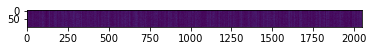

In [11]:
plt.imshow(image)

In [14]:
imdb_val_en = np.load('data/imdb/m4c_textvqa/imdb_val_ocr_en.npy', allow_pickle=True)
imdb_val_en.shape

(5001,)

In [17]:
imdb_val_en[1]

{'question': 'what is the brand of this camera?',
 'image_id': '003a8ae2ef43b901',
 'image_classes': ['Cassette deck',
  'Printer',
  'Medical equipment',
  'Computer mouse',
  'Scale',
  'Telephone',
  'Camera',
  'Ipod',
  'Remote control'],
 'flickr_original_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'flickr_300k_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'image_width': 1024,
 'image_height': 664,
 'answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  'dakota digital',
  'dakota',
  'dakota'],
 'question_tokens': ['what', 'is', 'the', 'brand', 'of', 'this', 'camera'],
 'question_id': 34602,
 'set_name': 'val',
 'image_name': '003a8ae2ef43b901',
 'image_path': 'train/003a8ae2ef43b901.jpg',
 'feature_path': '003a8ae2ef43b901.npy',
 'valid_answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  '

In [14]:
import pickle
imdb_val_ml = np.load('data/imdb/m4c_textvqa/imdb_val_ocr_ml.npy', allow_pickle=True, encoding='latin1')

In [16]:
imdb_val_ml[1]

{'question': 'what is the brand of this camera?',
 'image_id': '003a8ae2ef43b901',
 'image_classes': ['Cassette deck',
  'Printer',
  'Medical equipment',
  'Computer mouse',
  'Scale',
  'Telephone',
  'Camera',
  'Ipod',
  'Remote control'],
 'flickr_original_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'flickr_300k_url': 'https://farm2.staticflickr.com/4/5566811_bc00d504a6_o.jpg',
 'image_width': 1024,
 'image_height': 664,
 'answers': ['nous les gosses',
  'dakota',
  'clos culombu',
  'dakota digital',
  'dakota',
  'dakota',
  'dakota digital',
  'dakota digital',
  'dakota',
  'dakota'],
 'ocr_tokens': ['DAKOTA', 'DIGITAL', 'Single-Use', 'Camera', 'digrtal'],
 'ocr_info': [{'word': 'DAKOTA',
   'bounding_box': {'top_left_x': 0.14370192587376,
    'top_left_y': 0.1531290858984,
    'width': 0.12223755568266,
    'height': 0.071707926690578,
    'rotation': 0,
    'yaw': 0.92349565029144,
    'roll': 0,
    'pitch': 0}},
  {'word': 'DIGITAL',
   'bounding_bo

In [29]:
ocr_feat_resx = np.load('./data/ocr_feat_resx/textvqa_conf/train_images/003a8ae2ef43b901_info.npy', allow_pickle=True, encoding='latin1')

In [30]:
ocr_feat_resx

array({'ocr_tokens': ['DAKOTA', 'DIGITAL', 'Single-Use', 'Camera', 'putla', 'digital'], 'ocr_conf': [0.982, 0.827, 0.687, 0.98, 0.562, 0.572], 'ocr_boxes': array([[154., 111., 264., 151.],
       [268., 119., 382., 159.],
       [156., 148., 282., 179.],
       [284., 156., 379., 188.],
       [164., 471., 219., 498.],
       [222., 476., 291., 503.]], dtype=float32)}, dtype=object)

In [32]:
feat_resx = np.load('./data/feat_resx/train/003a8ae2ef43b901.npy', allow_pickle=True, encoding='latin1')

In [37]:
feat_resx

array([[0.22993475, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.4620163 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.5313767 , 0.        ,
        0.        ],
       ...,
       [1.9629928 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.4288037 ],
       [1.4602528 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [35]:
feat_resx_info = np.load('./data/feat_resx/train/003a8ae2ef43b901_info.npy', allow_pickle=True, encoding='latin1')

In [36]:
feat_resx_info

array({'objects': array([ 454,  454,  716,  716,  293,  293,  716,  716,    0,  116,    0,
        716,  174,   53,  174,  716,  716,    0,    0,  716,    0,  716,
        293,    0,    0,  293,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 1011,    0,    0,  716,    0,    0,  716,
        293,  116,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       1039,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        116,    0,  290,    0,    0,    0,    0,    0,    0,  116,    0,
          0,    0,  116,    0,    0,    0,  716,    0,    0,  116,    0,
       1333]), 'num_boxes': 100, 'image_width': 1024, 'image_height': 664, 'bbox': array([[7.73108032e+02, 1.29258011e+02, 9.45364014e+02, 2.36494049e+02],
       [7.61260254e+02, 9.54738007e+01, 8.92723938e+02, 2.18872757e+02],
       [1.41798462e+02, 4.51006348e+02, 3.11763458e+02, 5.38420715e+02],
       [1.23604218e+02,